# Pytorch Cheatsheet

* settings

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import os
os.chdir("/content/drive/MyDrive/0. codepool_python/python_dl/mybook/pytorch")

In [30]:
import numpy as np
import torch
import matplotlib.pyplot as plt

## Data preparation

### Dataset - 自訂 class

In [12]:
from torch.utils.data import Dataset

class MyDataset(Dataset):
    def __init__(self, feature_matrix, label_vector):             # 把資料存進 class object
        self.feature_matrix = feature_matrix
        self.label_vector = label_vector
    def __len__(self):
        assert len(self.feature_matrix) == len(self.label_vector) # 確定資料有互相對應
        return len(self.feature_matrix)
    def __getitem__(self, idx):                     # 定義我們需要取得某筆資料的方式
        return self.feature_matrix[idx], self.label_vector[idx]

In [14]:
# 測試看看

X = np.random.rand(1000, 100, 100, 1)   # 虛構 1000 張 100 x 100 單色圖片
Y = np.random.randint(0, 7, [1000, 10]) # 虛構 1000 個 labels

my_dataset = MyDataset(X.astype(np.float32), Y.astype(np.float32))
taken_x, taken_y = my_dataset[0] # 取得第一筆資料
taken_x.shape, taken_y.shape

((100, 100, 1), (10,))

### Dataset - 直接用 `TensorDataset`

In [8]:
from torch.utils.data import TensorDataset

# 手上有的資料，先轉成 Tensor
X = np.random.rand(1000, 100, 100, 1)   # 虛構 1000 張 100 x 100 單色圖片
Y = np.random.randint(0, 7, [1000, 10]) # 虛構 1000 個 labels
tsrX, tsrY = torch.tensor(X), torch.tensor(Y)

# 餵到 TensorDataset 裡面
tsrdataset = TensorDataset(tsrX, tsrY)

In [11]:
# 測試看看
taken_x, taken_y = tsrdataset[0] # 取得第一筆資料
taken_x.shape, taken_y.shape

(torch.Size([100, 100, 1]), torch.Size([10]))

### DataLoader

In [17]:
from torch.utils.data import DataLoader

# 將 dataset 包裝成 dataloader
my_dataloader = DataLoader(
    my_dataset, 
    batch_size=4,
    shuffle=True #, 
    # num_workers=4
)

# 跑一個 loop 確認拿到的 batch 是否正確
for batch_x, batch_y in my_dataloader:
    print((batch_x.shape, batch_y.shape))
    break

(torch.Size([4, 100, 100, 1]), torch.Size([4, 10]))


## Transforms

## NN structures

### import

* 萬用起手式

In [18]:
import torch.nn as nn
import torch.nn.functional as F

### activation functions

#### 內建

| activation function | `torch.nn as nn`                    | `torch.nn.functional as F` |
|:-------------------:| ----------------------------------- | -------------------------- |
| Sigmoid             | `nn.Sigmoid()`                      | `F.sigmoid`                |
| Softmax             | `nn.Softmax(dim=None)`              | `F.softmax`                |
| ReLU                | `nn.ReLU()`                         | `F.relu`                   |
| LeakyReLU           | `nn.LeakyReLU(negative_slope=0.01)` | `F.leaky_relu`             |
| Tanh                | `nn.Tanh()`                         | `F.tanh`                   |
| GELU                | `nn.GELU()`                         | `F.gelu`                   |
| ReLU6               | `nn.ReLU6()`                        | `F.relu6`                  |

##### ReLU

* 主要重點：  
  * $ReLU(x) = max(x, 0)$  
  * $\frac{x}{dx} ReLU(x) = 1$ if x > 0; $\frac{x}{dx} ReLU(x) = 0$ if x <= 0
  * relu 的導數，在 x = 0 時，數學上是不存在，但在工程上 "定義" 導數為 0，這樣就能繼續做了  
  * relu 的優點是求導的結果簡單，不是 0 就是 1，在 backward 更新參數時， `weight_new = weight_old - learning_rate * grad`，那 grad 不是 0 就是 1，減輕了以往NN的梯度消失問題。  
* 簡單範例：

In [38]:
activation = nn.ReLU()

x = torch.arange(-8.0, 8.0, 0.1, requires_grad=True)
y = activation(x)
print(y)

tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.1000, 0.2000, 0.3000, 0.4000, 0.5000, 0.6000, 0.7000, 0.8000, 0.9000,
        1.0000, 1.1000, 1.2000, 1.3000, 1.4000, 1.5000, 1.6000, 1.7000, 1.8000,
        1.9000, 2.0000, 2.1000, 2.2000, 2.3000, 2.4000, 2.5000, 2.6000, 2.7000,
        2.8000, 2.9000, 3.0000, 3.1000, 

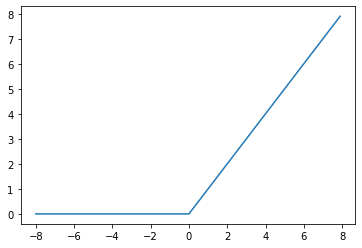

In [39]:
plt.plot(x.detach(), y.detach());

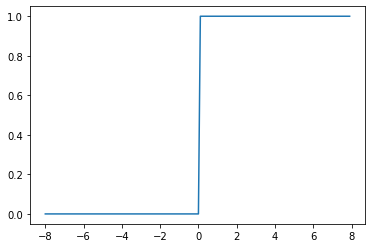

In [40]:
y.backward(torch.ones_like(x), retain_graph=True)
plt.plot(x.detach(), x.grad); # gradient

##### Sigmoid

* 主要重點：  
  * $sigmoid(x) = \frac{1}{1 + exp(-x)}$  
  * $\frac{x}{dx} sigmoid(x) = sigmoid(x)(1-sigmoid(x))$  
  * 從導數的性質，可以發現，gradient 在 x 靠近 0 時，值較大 (參數更新較快）， x 遠離 0 時， gradient 趨近於 0 (參數停止更新)

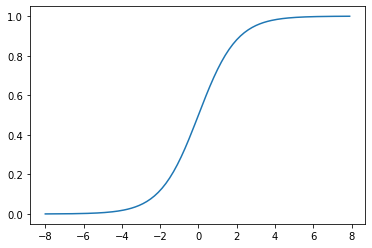

In [41]:
activation = nn.Sigmoid()

x = torch.arange(-8.0, 8.0, 0.1, requires_grad=True)
y = activation(x)

plt.plot(x.detach(), y.detach());

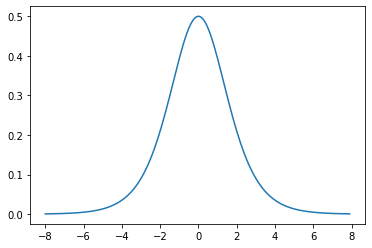

In [45]:
# gradients
y.backward(torch.ones_like(x),retain_graph=True)
plt.plot(x.detach(), x.grad);

#### 自訂

* 直接定義一個 function

In [46]:
def relu(x):
    a = torch.zeros_like(x) # shape 會與 x 一樣
    return torch.max(x, a)

### layers

#### NN

##### `nn.Linear(in_dim, out_dim)`

#### CNN

##### convolution

* 2d convolution: `nn.Conv2d(in_channels, out_channels, kernel_size, stride=1, padding=0)`  
* 1d convolution

##### pooling

* maximum pooling:  `nn.MaxPool2d(kernel_size, stride=None, padding=0, dilation=1)`   
* average pooling:   
* global maximum pooling:   
* global average pooling:  

#### RNN

#### 自訂 layers

#### 將 layer 組成 block

##### `nn.Sequential(layer1, layer2, ...)`

##### 自訂 module

#### 經典 block

##### vgg block

##### resnet block

## Loss

### 二元分類問題

### 多元分類問題

### 回歸問題

### 自訂 loss

### 對比學習

### autoencoder

## Optimizer

### 建立 optimizer

## Training loops

### 完整版 (了解概念用)

* Data 準備

In [25]:
from torch.utils.data import TensorDataset

# Training
X = np.random.rand(1000, 100, 100, 1)   # 虛構 1000 張 100 x 100 單色圖片
Y = np.random.randint(0, 7, [1000, 10]) # 虛構 1000 個 labels

X, Y = X.astype(np.float32), Y.astype(np.float32)
tsrX, tsrY = torch.tensor(X), torch.tensor(Y)
tsrdataset = TensorDataset(tsrX, tsrY)

tsrdataloader = DataLoader(
    tsrdataset, batch_size=4,
    shuffle=True, num_workers=4)

# Validation
vX = np.random.rand(100, 100, 100, 1)   # 虛構 100 張 100 x 100 單色圖片
vY = np.random.randint(0, 7, [100, 10]) # 虛構 100 個 labels

vX, vY = vX.astype(np.float32), vY.astype(np.float32)
vtsrX, vtsrY = torch.tensor(vX), torch.tensor(vY)
vtsrdataset = TensorDataset(tsrX, tsrY)

vtsrdataloader = DataLoader(
    vtsrdataset, batch_size=4,
    shuffle=False, num_workers=4) # Validation 不需要 shuffle

* model structure

In [58]:
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc = nn.Sequential(
            nn.Flatten(),
            nn.Linear(10000, 500),
            nn.ReLU(),
            nn.Linear(500, 10)
        )
    def forward(self, x):
        # 傳入 model 的函數會經過 forward 做 inference
        # x = x.view(x.size(0), -1) # flatten 的意思，原本的 x.size = (batch_size, 100, 100, 1) -> 改成 (batch_size, 100*100*1)
        return self.fc(x)

* 確定 device

In [56]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [57]:
# model structure
simpleNN = SimpleNN()
simpleNN.to(device)                           # 把 model 移到 GPU 計算

# optimizer
optim = torch.optim.Adam(
    simpleNN.parameters(), lr=1e-4)

# loss
criterion = nn.MSELoss()

* tensorboard 設定

In [59]:
# tensorboard setting
%load_ext tensorboard

import os
logs_base_dir = "runs" # training 的紀錄，放在這個路徑下
os.makedirs(logs_base_dir, exist_ok=True)

from torch.utils.tensorboard import SummaryWriter
tb = SummaryWriter()

* 開始 Training， 本質就是跑一個迴圈，在每一次（叫一個 **epoch**）要做的事有——
  1. 載入資料
  2. 經過 model 跑一次
  3. 比對資料的正確性，算誤差（loss）
  4. 把梯度清掉，然後根據這次誤差算新的梯度
  5. 根據 optimizer 更新參數
  6. 為了方便觀察，將本次 epoch 訓練的變化顯示出來，包括
     - 進度條（觀察訓練快慢）
     - batch loss （這個有時候會輸出太多東西）
     - epoch loss （記得累計並除掉資料數量）
     - 記錄到其他變數中（方便作圖）
     - 記錄到 Tensorboard 中（SummaryWriter）

* 為了避免 overfit，我們每個 epoch 還會進行一次 validation，事情少一些，變成——
  1. 載入資料
  2. 經過 model 跑一次
  3. 比對資料的正確性，算誤差（loss）
  4. 為了方便觀察，將本次 epoch validate 的結果顯示出來，包括
     - 進度條（觀察訓練快慢）
     - batch loss （這個有時候會輸出太多東西）
     - epoch loss （記得累計並除掉資料數量）
     - 記錄到其他變數中（方便作圖）
     - 記錄到 Tensorboard 中（SummaryWriter）

In [ ]:
%tensorboard --logdir {logs_base_dir} # 開啟 tensorboard

In [61]:
# training loop
EPOCHS = 10
for epoch in range(EPOCHS):
    # training step (training data)
    simpleNN.train() # 切換 simpleNN 為 training 模式，dropout 之類的操作會開啟
    epoch_loss = 0.0
    for x, y in tsrdataloader:
        y_hat = simpleNN(x.to(device))        # 把 x tensor 移到 GPU 計算
        loss = criterion(y.to(device), y_hat) # 把 y tensor 移到 GPU 計算，
                                              ##  y_hat 因為是從 GPU model input GPU Tensor 出來的
                                              ##  所以不用再次 .to(device) 當然要也是沒差啦 =_=|||
        optim.zero_grad() # 把 trainable variable/weights/parameters 的 gradient 給 歸 0
        loss.backward() # 利用 loss，計算出每個 trainable variable/weights/parameters 所對應的 gradient
        optim.step() # 更新 trainable variable/weights/parameters 的值： parameters_new = parameters_old - learning_rate * gradient
        epoch_loss += loss.item()
    average_epoch_loss = epoch_loss / len(tsrdataset)
    print(f"Training   Epoch {epoch + 1:2d}: Loss = {average_epoch_loss:.4f}")
    tb.add_scalar("Loss/train", average_epoch_loss, epoch + 1) # 寫進 tensorboard
    

    # evaluation step (validation data)
    simpleNN.eval() # 將 simpleNN 切換到 evaluation mode， dropout 之類的操作會關閉
    vepoch_loss = 0.0
    for x, y in vtsrdataloader:
        y_hat = simpleNN(x.to(device))
        loss = criterion(y.to(device), y_hat)
        vepoch_loss += loss.item()
    vaverage_epoch_loss = vepoch_loss / len(vtsrdataset)
    print(f"Validation Epoch {epoch + 1:2d}: Loss = {vaverage_epoch_loss:.4f}")
    tb.add_scalar("Loss/val", vaverage_epoch_loss, epoch + 1) # 寫進 tensorboard
tb.close() # 加這個

Training   Epoch  1: Loss = 1.0920
Validation Epoch  1: Loss = 0.9851
Training   Epoch  2: Loss = 0.9812
Validation Epoch  2: Loss = 0.9269
Training   Epoch  3: Loss = 0.9155
Validation Epoch  3: Loss = 0.8980
Training   Epoch  4: Loss = 0.8593
Validation Epoch  4: Loss = 0.7541
Training   Epoch  5: Loss = 0.7777
Validation Epoch  5: Loss = 0.6951
Training   Epoch  6: Loss = 0.7110
Validation Epoch  6: Loss = 0.6363
Training   Epoch  7: Loss = 0.6274
Validation Epoch  7: Loss = 0.5730
Training   Epoch  8: Loss = 0.5564
Validation Epoch  8: Loss = 0.4740
Training   Epoch  9: Loss = 0.4752
Validation Epoch  9: Loss = 0.3994
Training   Epoch 10: Loss = 0.3927
Validation Epoch 10: Loss = 0.3577


### 模組版 (實際做實驗, deploy 時用)

In [51]:
def accuracy(y_hat, y):  #@save
    """計算預測正確的數量"""
    if len(y_hat.shape) > 1 and y_hat.shape[1] > 1:
        y_hat = y_hat.argmax(axis=1)
    cmp = y_hat.type(y.dtype) == y
    return float(cmp.type(y.dtype).sum())

In [52]:
# 計算 metric 時用的
class Accumulator:  #@save
    """在n个變量上累加"""
    def __init__(self, n):
        self.data = [0.0] * n # [0.0, 0.0, ..., 0.0], 共 n 個 0.0

    def add(self, *args):
        self.data = [a + float(b) for a, b in zip(self.data, args)]

    def reset(self):
        self.data = [0.0] * len(self.data)

    def __getitem__(self, idx):
        return self.data[idx]

In [53]:
def evaluate_accuracy(model, data_iter):  #@save
    """計算在指定數據集上，模型的準確度"""
    if isinstance(model, torch.nn.Module):
        model.eval()  # 将模型设置为评估模式
    metric = Accumulator(2)  # 正确预测数、预测总数
    with torch.no_grad():
        for X, y in data_iter:
            metric.add(accuracy(net(X), y), y.numel())
    return metric[0] / metric[1]

In [54]:
# 單一 epoch 裡要做的事
def train_epoch(model, train_iter, loss, optimizer):  #@save
    
    model.train()
    # 訓練損失總和、訓練準確度總和、樣本數
    metric = Accumulator(3)
    for X, y in train_iter:
        y_hat = model(X)
        l = loss(y_hat, y)
        optimizer.zero_grad()
        l.mean().backward()
        optimizer.step()
        
        metric.add(float(l.sum()), accuracy(y_hat, y), y.numel())
    # 返回訓練損失 & 訓練準確度
    return metric[0] / metric[2], metric[1] / metric[2]

In [ ]:
class Animator:  #@save
    """在動畫中繪製數據"""
    def __init__(self, xlabel=None, ylabel=None, legend=None, xlim=None,
                 ylim=None, xscale='linear', yscale='linear',
                 fmts=('-', 'm--', 'g-.', 'r:'), nrows=1, ncols=1,
                 figsize=(3.5, 2.5)):
        # 增量地绘制多条线
        if legend is None:
            legend = []
        d2l.use_svg_display()
        self.fig, self.axes = d2l.plt.subplots(nrows, ncols, figsize=figsize)
        if nrows * ncols == 1:
            self.axes = [self.axes, ]
        # 使用lambda函数捕获参数
        self.config_axes = lambda: d2l.set_axes(
            self.axes[0], xlabel, ylabel, xlim, ylim, xscale, yscale, legend)
        self.X, self.Y, self.fmts = None, None, fmts

    def add(self, x, y):
        # 向图表中添加多个数据点
        if not hasattr(y, "__len__"):
            y = [y]
        n = len(y)
        if not hasattr(x, "__len__"):
            x = [x] * n
        if not self.X:
            self.X = [[] for _ in range(n)]
        if not self.Y:
            self.Y = [[] for _ in range(n)]
        for i, (a, b) in enumerate(zip(x, y)):
            if a is not None and b is not None:
                self.X[i].append(a)
                self.Y[i].append(b)
        self.axes[0].cla()
        for x, y, fmt in zip(self.X, self.Y, self.fmts):
            self.axes[0].plot(x, y, fmt)
        self.config_axes()
        display.display(self.fig)
        display.clear_output(wait=True)

In [ ]:
def train(model, train_iter, valid_iter, loss, num_epochs, optimizer):  #@save
    #animator = Animator(xlabel='epoch', xlim=[1, num_epochs], ylim=[0.3, 0.9],
    #                    legend=['train loss', 'train acc', 'test acc'])
    for epoch in range(num_epochs):
        train_metrics = train_epoch(model, train_iter, loss, updater)
        valid_acc = evaluate_accuracy(model, valid_iter)
        animator.add(epoch + 1, train_metrics + (valid_acc,))
    train_loss, train_acc = train_metrics
    assert train_loss < 0.5, train_loss
    assert train_acc <= 1 and train_acc > 0.7, train_acc
    assert valid_acc <= 1 and valid_acc > 0.7, valid_acc

### CNN

## Inspection

## Prediction

* data 準備 (testing data)

In [27]:
# Testing
tX = np.random.rand(100, 100, 100, 1)   # 虛構 100 張 100 x 100 單色圖片
tY = np.random.randint(0, 7, [100, 10]) # 虛構 100 個 labels

tX, tY = tX.astype(np.float32), tY.astype(np.float32)
ttsrX, ttsrY = torch.tensor(tX), torch.tensor(tY)
ttsrdataset = TensorDataset(tsrX, tsrY)

ttsrdataloader = DataLoader(
    ttsrdataset, batch_size=4,
    shuffle=False, num_workers=4) # Testing 不需要 shuffle

In [ ]:
# prediction
simpleNN.eval()
y_hat = [simpleNN(x) for x, y in ttsrdataloader]

In [ ]:
def predict(model, test_iter, n=6):  #@save
    for X, y in test_iter:
        break
    trues = d2l.get_fashion_mnist_labels(y)
    preds = d2l.get_fashion_mnist_labels(net(X).argmax(axis=1))
    titles = [true +'\n' + pred for true, pred in zip(trues, preds)]
    d2l.show_images(
        X[0:n].reshape((n, 28, 28)), 1, n, titles=titles[0:n])

predict_ch3(net, test_iter)

## Evaluation

## Save/ load model

### checkpoints

In [ ]:
# Save model
simpleNN.cpu() # 先移回 CPU
torch.save(simpleNN.state_dict(), "randmodel.model")

# Load model
model2 = SimpleNN()
model2.load_state_dict(torch.load("randmodel.model"))

# 確認是同一個 model
torch.equal(model2(x), simpleNN(x))

## Visualization

## Explaianation